<a href="https://colab.research.google.com/github/FaridRash/Advance-Statistical-Learnin--Semester-3/blob/main/Farid/Farid_Modeling_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Git

In [ ]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

Cloning into 'Advance-Statistical-Learnin--Semester-3'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 340 (delta 82), reused 8 (delta 3), pack-reused 207 (from 1)
Receiving objects: 100% (340/340), 48.22 MiB | 8.34 MiB/s, done.
Resolving deltas: 100% (150/150), done.


#Data Reading

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_Final.csv')
display(df.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1.0,>80,0.0,0,0.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1.0,40-60,0.0,0,0.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1.0,>80,0.0,0,0.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [ ]:
display(df.columns)

Index(['Patient_ID', 'Visit_ID', 'Sex', 'Age_at_onset', 'Clinical_onset_type',
       'Spirometry', 'FVC', 'Ventilation', 'Tracheostomy', 'PEG', 'Therapy',
       'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb', 'MRC_Bulbar',
       'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
       'CNS_Linear_Score', 'KINGS_Total', 'Disease_duration',
       'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'],
      dtype='object')

#PreProccessing

In [ ]:
"""
Ordinal Data:
FVC


Nominal Data:
Tracheostomy - Therapy - Ventilation - PEG - Clinical_onset_type - Spirometry




"""

'\nOrdinal Data:\nNONE\n\n\nNominal Data:\nTracheostomy - Therapy - Ventilation - PEG - Clinical_onset_type\n\n\n\n\n'

##TreeBase

### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select the nominal columns for encoding
nominal_cols = ['Tracheostomy', 'Therapy', 'Ventilation', 'PEG', 'Clinical_onset_type','Spirometry','FVC']

# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Apply Label Encoding to each nominal column
for col in nominal_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Display the first few rows of the new DataFrame to verify
display(df_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,3,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,3,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,0,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


###PreProccessing

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('KINGS_Total', axis=1)
y = df_encoded['KINGS_Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1129, 23)
Testing set shape: (283, 23)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training data shape after scaling:", X_train_scaled.shape)
print("Testing data shape after scaling:", X_test_scaled.shape)

Training data shape after scaling: (1129, 23)
Testing data shape after scaling: (283, 23)


###Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier model
# You can tune the hyperparameters like n_estimators, max_depth, etc.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7774

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78        48
           2       0.54      0.68      0.60        53
           3       0.82      0.64      0.72        83
           4       0.90      0.95      0.93        99

    accuracy                           0.78       283
   macro avg       0.76      0.76      0.76       283
weighted avg       0.79      0.78      0.78       283



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost Classifier model
# You can tune hyperparameters like n_estimators, learning_rate, max_depth, etc.
model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

# Adjust the target variable to be 0-indexed for XGBoost
y_train_indexed = y_train - 1
y_test_indexed = y_test - 1


# Train the model using the scaled data
model_xgb.fit(X_train_scaled, y_train_indexed)

# Make predictions on the scaled test set
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_indexed, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Print classification report for more detailed evaluation
print("\nXGBoost Classification Report:")
print(classification_report(y_test_indexed, y_pred_xgb))

XGBoost Accuracy: 0.8092

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        48
           1       0.62      0.64      0.63        53
           2       0.80      0.76      0.78        83
           3       0.93      0.93      0.93        99

    accuracy                           0.81       283
   macro avg       0.79      0.79      0.79       283
weighted avg       0.81      0.81      0.81       283



##LinearModel

###Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select the 'FVC' column for encoding
fvc_col = ['FVC' , 'Tracheostomy','Spirometry','PEG','Ventilation']

# Apply Label Encoding to the 'FVC' column in df_encoded
for col in fvc_col:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,3,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,3,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,0,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,3,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [ ]:
# Select the columns to one-hot encode
cols_to_onehot = ['Therapy', 'Clinical_onset_type']

# Apply one-hot encoding to the selected columns in df_encoded
df_encoded = pd.get_dummies(df_encoded, columns=cols_to_onehot, dtype=int)

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Diagnostic_delay,...,ALSFRS_R,ALSAQ_5,Therapy_0,Therapy_1,Therapy_2,Therapy_3,Clinical_onset_type_0,Clinical_onset_type_1,Clinical_onset_type_2,Clinical_onset_type_3
0,133,3,0,19.0,1,3,0,0,0,33.0,...,45.0,0.0,0,1,0,0,0,0,0,1
1,79,1,0,65.0,1,0,0,0,0,14.0,...,38.0,15.0,0,0,0,1,0,0,0,1
2,81,1,1,79.0,1,3,0,0,0,6.0,...,43.0,20.0,0,0,0,1,1,0,0,0
3,214,1,0,51.0,1,3,0,0,0,18.0,...,44.0,20.0,0,1,0,0,0,0,0,1
4,214,2,0,51.0,1,3,0,0,0,18.0,...,45.0,25.0,0,1,0,0,0,0,0,1


###PreProcessing

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using the updated df_encoded
X_linear = df_encoded.drop('KINGS_Total', axis=1)
y_linear = df_encoded['KINGS_Total']

# Split data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

print("Training set shape:", X_train_linear.shape)
print("Testing set shape:", X_test_linear.shape)

Training set shape: (1129, 29)
Testing set shape: (283, 29)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_linear = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_linear_scaled = scaler_linear.fit_transform(X_train_linear)
X_test_linear_scaled = scaler_linear.transform(X_test_linear)

print("Training data shape after scaling:", X_train_linear_scaled.shape)
print("Testing data shape after scaling:", X_test_linear_scaled.shape)

Training data shape after scaling: (1129, 29)
Testing data shape after scaling: (283, 29)


###Modeling

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM Classifier model
# You can tune hyperparameters like C, kernel, gamma, etc.
model_svm = SVC(random_state=42)

# Train the model using the scaled data
model_svm.fit(X_train_linear_scaled, y_train_linear)

# Make predictions on the scaled test set
y_pred_svm = model_svm.predict(X_test_linear_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test_linear, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Print classification report for more detailed evaluation
print("\nSVM Classification Report:")
print(classification_report(y_test_linear, y_pred_svm))

SVM Accuracy: 0.7350

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.60      0.60        48
           2       0.51      0.60      0.55        53
           3       0.84      0.63      0.72        83
           4       0.87      0.96      0.91        99

    accuracy                           0.73       283
   macro avg       0.70      0.70      0.70       283
weighted avg       0.75      0.73      0.73       283



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the model
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(y_train_linear.unique()), activation='softmax') # Output layer with softmax for multi-class classification
])

# Compile the model
model_ann.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                  metrics=['accuracy'])

# Adjust the target variable to be 0-indexed for ANN
y_train_linear_indexed = y_train_linear - 1
y_test_linear_indexed = y_test_linear - 1

# Train the model
history = model_ann.fit(X_train_linear_scaled, y_train_linear_indexed, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test_linear_scaled, y_test_linear_indexed, verbose=0)
print(f"ANN Accuracy: {accuracy_ann:.4f}")

# Make predictions and print classification report
y_pred_ann = model_ann.predict(X_test_linear_scaled)
y_pred_ann_classes = tf.argmax(y_pred_ann, axis=1)

print("\nANN Classification Report:")
# Use the original y_test_linear for the classification report labels for clarity
print(classification_report(y_test_linear_indexed, y_pred_ann_classes))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Accuracy: 0.7385
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.56      0.60        48
           1       0.46      0.62      0.53        53
           2       0.78      0.70      0.74        83
           3       0.96      0.92      0.94        99

    accuracy                           0.74       283
   macro avg       0.71      0.70      0.70       283
weighted avg       0.76      0.74      0.75       283



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the model
model_nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_linear_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(len(y_train_linear.unique()), activation='softmax') # Output layer with softmax for multi-class classification
])

# Compile the model
model_nn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
                 metrics=['accuracy'])

# Display the model summary
model_nn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 32)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,556 (6.08 KB)

 Trainable params: 1,556 (6.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train.columns.size

23

In [ ]:
# Adjust the target variable to be 0-indexed for training
y_train_linear_indexed = y_train_linear - 1
y_test_linear_indexed = y_test_linear - 1

# Train the model
history = model_nn.fit(X_train_linear_scaled, y_train_linear_indexed, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy_nn = model_nn.evaluate(X_test_linear_scaled, y_test_linear_indexed, verbose=0)
print(f"\nNeural Network Accuracy: {accuracy_nn:.4f}")

# Make predictions and print classification report
y_pred_nn = model_nn.predict(X_test_linear_scaled)
y_pred_nn_classes = tf.argmax(y_pred_nn, axis=1)

print("\nNeural Network Classification Report:")
print(classification_report(y_test_linear_indexed, y_pred_nn_classes))

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2926 - loss: 1.5960 - val_accuracy: 0.3761 - val_loss: 1.3269
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4680 - loss: 1.2394 - val_accuracy: 0.5044 - val_loss: 1.1882
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5233 - loss: 1.1203 - val_accuracy: 0.5575 - val_loss: 1.0924
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5896 - loss: 1.0396 - val_accuracy: 0.6106 - val_loss: 1.0125
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6282 - loss: 0.9381 - val_accuracy: 0.6106 - val_loss: 0.9406
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6491 - loss: 0.8777 - val_accuracy: 0.6460 - val_loss: 0.8791
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6837 - loss: 0.7947 - val_accuracy: 0.6770 - val_loss: 0.8201
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6518 - loss: 0.7888 - val_accuracy: 0.6903 - val_los

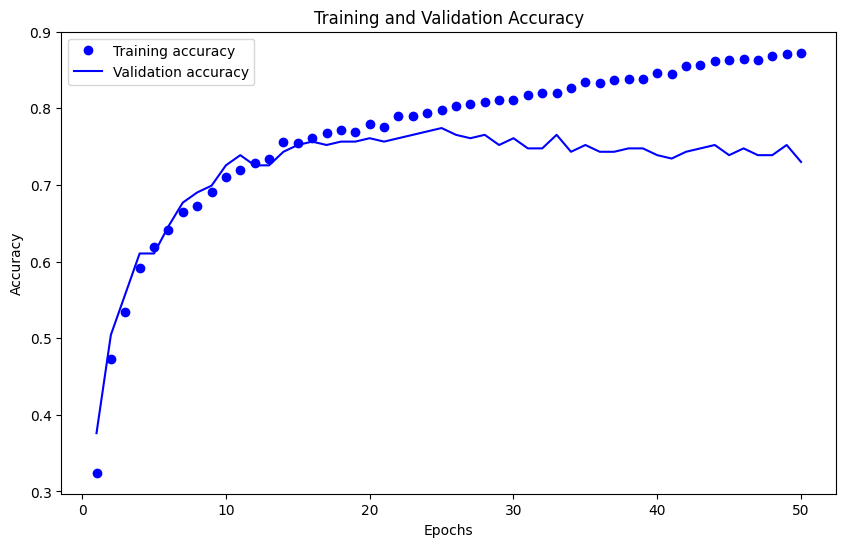

In [ ]:
import matplotlib.pyplot as plt

# Get the accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

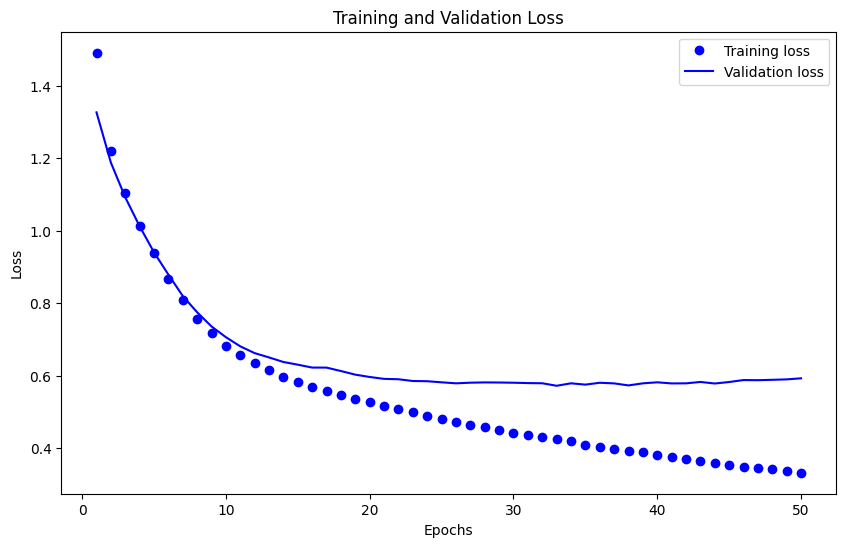

In [ ]:
import matplotlib.pyplot as plt

# Get the loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()